# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250707'
object = 'V462Lup'
channel = '1'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:23.009000,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:27.129063,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:31.249125,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:35.369188,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:39.489251,3.0,0,0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:04.094000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,12,L4,CLEAR,True
3002,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:36.692000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,13,L4,CLEAR,True
3003,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:09.391000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,14,L4,CLEAR,True
3004,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:42.247000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,15,L4,CLEAR,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs1/20250707_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

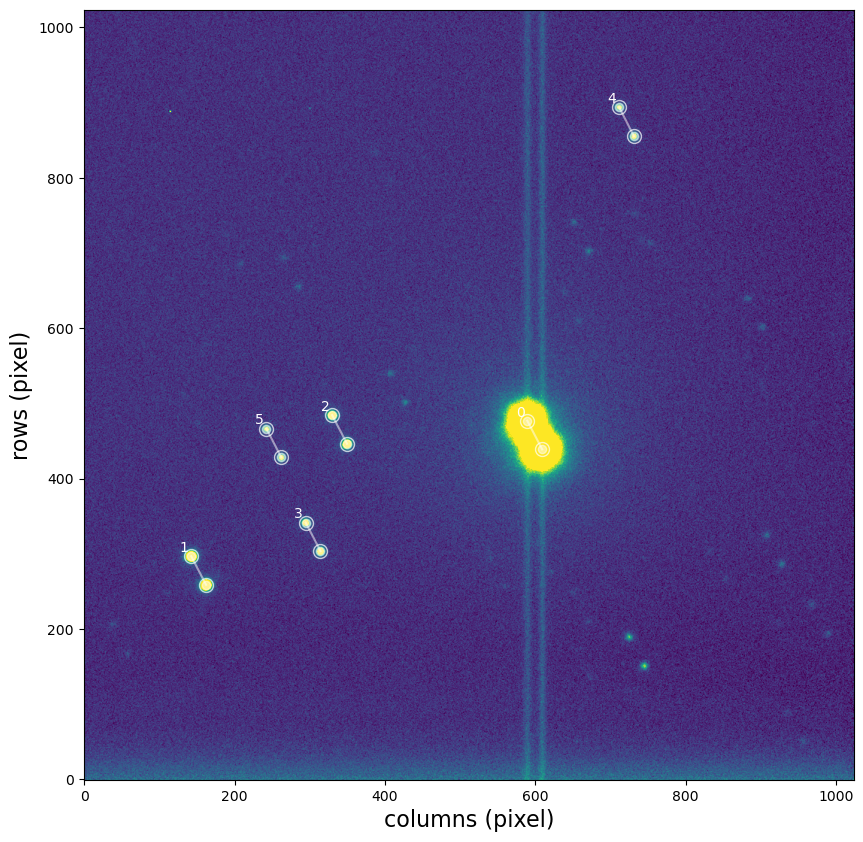

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.003976,-40.144686,609.119183,438.829349,7.417345,7.417345,-16.462474,0.001613,-9.220446,0.037557,10,0
1,1,227.058242,-40.162113,162.121608,258.726874,7.122482,7.122482,-11.905731,0.018739,NaN,NaN,10,0
2,2,227.035907,-40.144369,349.518637,446.368701,7.110238,7.110238,-11.023478,0.036237,-5.993837,0.457577,10,0
3,3,227.039884,-40.157807,314.280407,303.567800,6.983058,6.983058,-10.415672,0.059140,NaN,NaN,10,0
4,4,226.989893,-40.105401,731.060983,855.451947,7.066105,7.066105,-9.921606,0.089665,NaN,NaN,10,0
5,5,227.046545,-40.146185,262.093705,428.278533,6.918555,6.918555,-9.850469,0.095732,-2.725634,9.119495,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

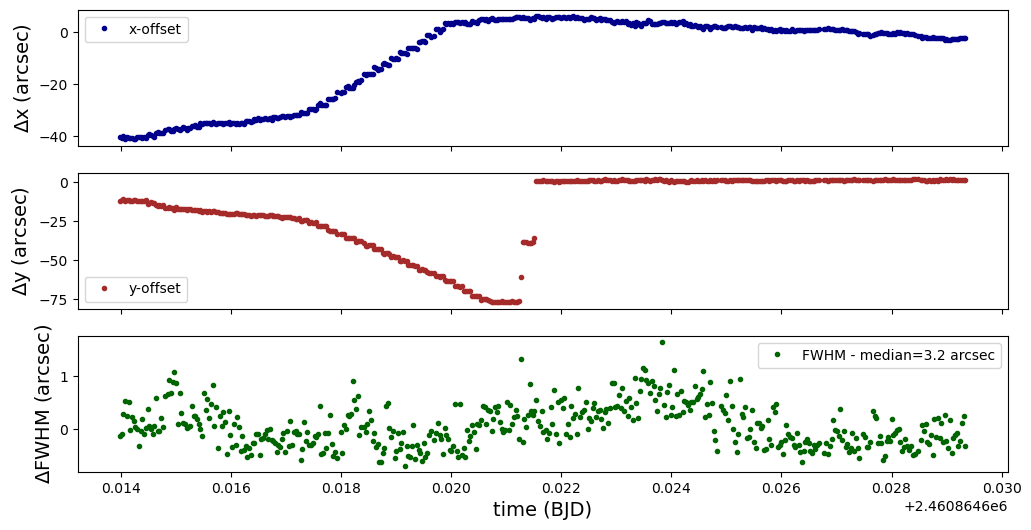

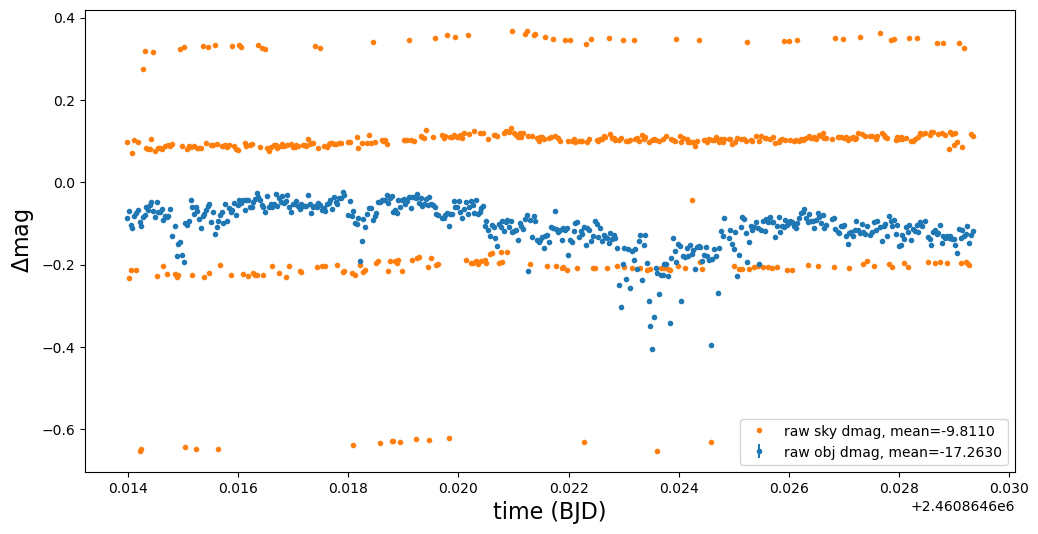

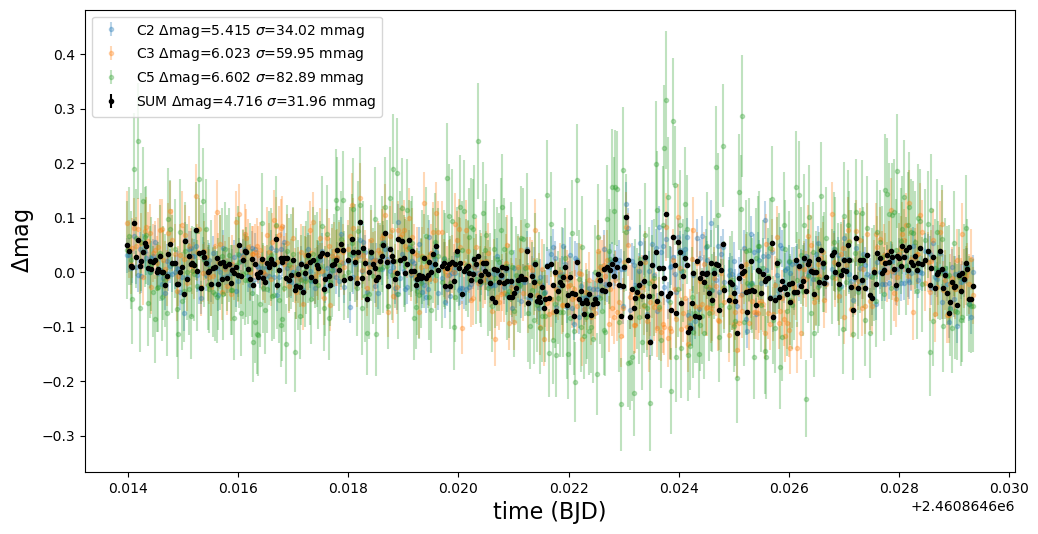

       TIME                x         ...       diffmagsum      
------------------ ----------------- ... ----------------------
2460864.6139837755 599.2166943418015 ...    0.04903803987538424
2460864.6140162614 597.9666943418015 ...    0.03911225343514779
2460864.6140469303 600.7166943418015 ...   0.010534145647870474
 2460864.614077287 597.2166943418015 ...   0.008674242146586408
 2460864.614108616 599.2166943418015 ...    0.08946812323494058
2460864.6141422247 598.4666943418015 ...   0.028077570429825727
 2460864.614172778 598.4666943418015 ...    0.05850229729012213
               ...               ... ...                    ...
2460864.6291524163 711.2166943418015 ... -0.0016670649270729143
 2460864.629183085 711.7166943418015 ...  -0.012449622892196643
 2460864.629214287 711.9666943418015 ...    0.01631571524612241
2460864.6292460556 712.4666943418015 ...   0.005877513504454868
2460864.6292772917 712.4666943418015 ...  -0.049222408116905925
 2460864.629308852 713.2166943418015 ...

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,5]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs1/20250707_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2907   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   3922   6R x 1955C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0477,EFE0477,FO0478,EFO0478,FE0478,EFE0478,FO0479,EFO0479,FE0479,EFE0479
0,2.0,10.0,0.0,227.003976,-40.144686,589.314206,476.901611,609.119183,438.829349,6.748689,...,4.041663e+06,5924.392584,3.714072e+06,5691.358925,4.127277e+06,5983.279913,3.744541e+06,5713.628830,4.156782e+06,6007.601628
1,2.0,10.0,1.0,227.058242,-40.162113,142.385233,296.776214,162.121608,258.726874,6.154247,...,6.160064e+04,1242.011369,5.715819e+04,1246.657552,6.398962e+04,1262.911236,5.537785e+04,1229.631457,6.586617e+04,1277.601520
2,2.0,10.0,2.0,227.035907,-40.144369,329.764136,484.387093,349.518637,446.368701,6.399263,...,2.892636e+04,1135.550155,2.714820e+04,1136.437004,3.055542e+04,1152.864947,2.575935e+04,1133.806183,2.814879e+04,1129.783297
3,2.0,10.0,3.0,227.039884,-40.157807,294.552289,341.563135,314.280407,303.567800,6.582417,...,1.593794e+04,1080.495664,1.479040e+04,1086.154394,1.510259e+04,1103.473083,1.531758e+04,1085.346282,1.669486e+04,1100.734333
4,2.0,10.0,4.0,226.989893,-40.105401,711.397515,893.999580,731.060983,855.451947,7.160955,...,1.312415e+04,1074.216601,8.637644e+03,1072.512290,1.138931e+04,1078.055580,8.769943e+03,1075.851905,9.406067e+03,1078.590150
5,2.0,10.0,5.0,227.046545,-40.146185,242.411438,466.272031,262.093705,428.278533,6.980145,...,9.826696e+03,1064.038748,8.929096e+03,1071.219768,1.004718e+04,1081.285166,9.276791e+03,1061.402251,9.836876e+03,1070.548515


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0477', 'EFE0477', 'FO0478', 'EFO0478', 'FE0478', 'EFE0478', 'FO0479',
       'EFO0479', 'FE0479', 'EFE0479'],
      dtype='object', length=1955)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-09 17:03:43,315 astropop - INFO - Normalization disabled.  [__init__]


2025-10-09 17:03:43,315 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-09 17:03:43,339 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-09 17:03:43,339 | INFO | Source index: i=0 


2025-10-09 17:03:43,340 root - INFO - Source RA=227.00397630162837 Dec=-40.14468563314991 mag=-24.08377+-0.00005  [pipeline_lib]


2025-10-09 17:03:43,340 | INFO | Source RA=227.00397630162837 Dec=-40.14468563314991 mag=-24.08377+-0.00005


2025-10-09 17:03:43,341 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-09 17:03:43,341 | INFO | Best aperture radius: 20.0 pixels


2025-10-09 17:03:43,341 root - INFO - Polarization in Q: -0.0005+-0.0001  [pipeline_lib]


2025-10-09 17:03:43,341 | INFO | Polarization in Q: -0.0005+-0.0001


2025-10-09 17:03:43,342 root - INFO - Polarization in U: -0.0018+-0.0002  [pipeline_lib]


2025-10-09 17:03:43,342 | INFO | Polarization in U: -0.0018+-0.0002


2025-10-09 17:03:43,343 root - INFO - Polarization in V: -0.0000+-0.0001  [pipeline_lib]


2025-10-09 17:03:43,343 | INFO | Polarization in V: -0.0000+-0.0001


2025-10-09 17:03:43,344 root - INFO - Total linear polarization p: 0.0018+-0.0002  [pipeline_lib]


2025-10-09 17:03:43,344 | INFO | Total linear polarization p: 0.0018+-0.0002


2025-10-09 17:03:43,345 root - INFO - Angle of polarization theta: 127+-4 deg  [pipeline_lib]


2025-10-09 17:03:43,345 | INFO | Angle of polarization theta: 127+-4 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-09 17:03:43,347 root - INFO - Free constant k: 0.9063649470293158+-0.0  [pipeline_lib]


2025-10-09 17:03:43,347 | INFO | Free constant k: 0.9063649470293158+-0.0


2025-10-09 17:03:43,347 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-10-09 17:03:43,347 | INFO | Zero of polarization: 28.2+-0.0


2025-10-09 17:03:43,348 root - INFO - RMS of zi residuals: 0.0019192602830131315  [pipeline_lib]


2025-10-09 17:03:43,348 | INFO | RMS of zi residuals: 0.0019192602830131315


2025-10-09 17:03:43,348 root - INFO - Reduced chi-square (n=480.0, DOF=477.0): 3.45  [pipeline_lib]


2025-10-09 17:03:43,348 | INFO | Reduced chi-square (n=480.0, DOF=477.0): 3.45


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-09 17:03:43,456 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:03:43,456 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:03:43,462 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:03:43,462 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:03:43,713 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:03:43,713 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:03:43,719 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:03:43,719 | INFO | Substituting symbol \perp from STIXGeneral


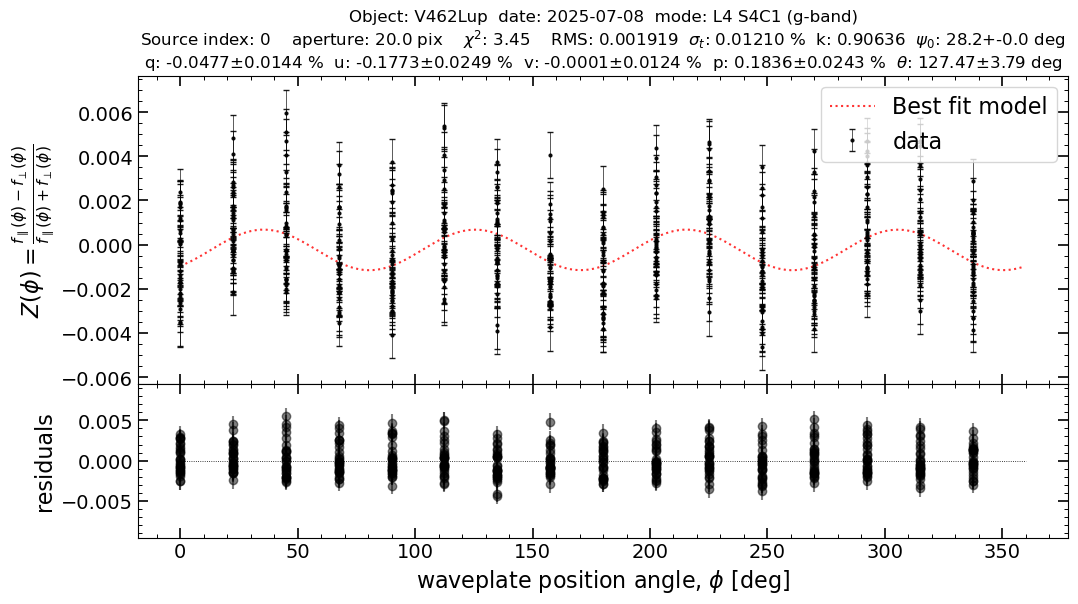

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs1/20250707_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 480
MAG : -24.08377+-0.00005
RA : 227.00397630162837
DEC : -40.14468563314991
FWHM : 6.74868933854765
X1 : 589.3142056424856
Y1 : 476.9016107146239
X2 : 609.1191830411174
Y2 : 438.8293494078959
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.18+-0.02 %  Angle of polarization: 127+-4 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

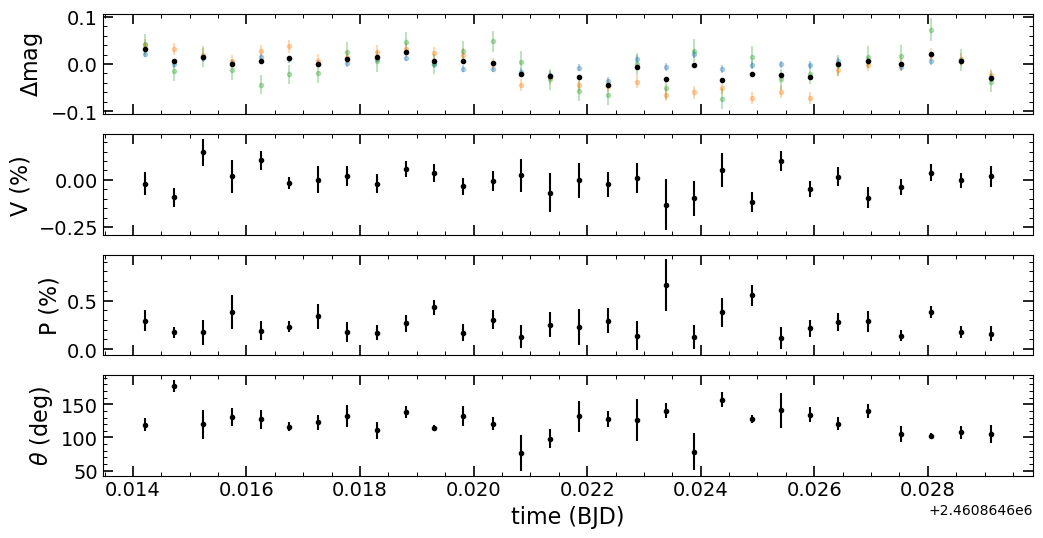

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.022188305061371594,0.007856607221796184,0.039424065390216256,0.01354088062600059,0.0412398625707695,0.022319746439343917,2460864.6142187417,589.3142056424856,476.9016107146239,609.1191830411174,438.8293494078959,6.911806552153214,-20.294332167838107,0.0002792788492782971,-15.546532589365764,0.027258371489412587,0.030778755307469652,0.002937214946934828,0.0010779003917327254,119.45041402059562,10.49564017632652
-0.0008552755407542634,0.007822975584757388,0.0316611756170353,0.013667316110758726,-0.014458136050288672,0.021591389370726074,2460864.6147308527,592.0642056424856,470.9016107146239,611.8691830411174,432.8293494078959,7.33832928061784,-20.272197402418215,0.0002823169254569985,-15.548720983090174,0.02671972049049577,0.006455596163167598,0.0017285529906953115,0.000580259387560306,177.40538015612782,9.600757728317738
0.011752580460106188,0.007800468576360369,0.019886158610242788,0.013333353442048265,0.01541807066410783,0.021860892894587123,2460864.6152415974,599.3142056424856,464.4016107146239,619.1191830411174,426.3293494078959,7.052030851699659,-20.290142992885073,0.0002798833896606779,-15.558166925506603,0.02676358081487886,0.014955244213597396,0.0017153034718844892,0.001326561248969845,119.53146683809402,22.118332028358694
0.0016240334775510235,0.0077070735774433805,0.005821266316759832,0.013163045871275087,-0.011893553344329177,0.02127339814978476,2460864.615748252,605.3142056424856,457.4016107146239,625.1191830411174,419.3293494078959,7.37398583212035,-20.2937272238573,0.00027940365241866923,-15.57608453171891,0.02617227596854597,0.0006218689735160154,0.0038570180314530175,0.0017584094077620872,130.66359240324658,13.038702088475908
0.01387651249361177,0.007599588157024003,0.026534744000953125,0.013049366576127519,-0.04417905572822178,0.020096359716572632,2460864.6162539627,605.0642056424856,452.1516107146239,624.8691830411174,414.0793494078959,6.197717063249613,-20.32399128516324,0.0002754900729850965,-15.59966229478955,0.02513315932610695,0.0073081672088157745,0.0019151624847837576,0.0009743212154400101,127.19894357432412,14.549985697286992
0.010135615969847578,0.0075677463398221845,0.0373357051744545,0.013163014827623646,-0.02199194976899932,0.020503673245361106,2460864.6167553505,609.3142056424856,449.1516107146239,629.1191830411174,411.0793494078959,6.343143626062242,-20.324891200713424,0.00027534261842051524,-15.595312838163762,0.025508996842214568,0.01255753938478854,0.0023211246470236637,0.0005925975765800904,116.44297146606309,7.301758098998722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.0018272514676613838,0.007928060920362244,-0.07157554918294018,0.012584623670411112,-0.021330791732664167,0.021685363264181454,2460864.6259222506,713.8142056424856,514.901610714624,733.6191830411174,476.8293494078959,6.372866580624653,-20.270320921767727,0.0002826471760183095,-15.57965149547215,0.026291485589521636,-0.02635139686929655,0.0021307297849817663,0.000853820403953093,134.24209764062056,11.460516356966131
0.00625961202897507,0.007884068251630235,-0.012440098373074804,0.013131244982167724,-0.0029670436666098254,0.021833200284223368,2460864.6264186567,712.8142056424856,516.151610714624,732.6191830411174,478.0793494078959,6.119339653245419,-20.286337168666492,0.0002804774389354741,-15.570148473754209,0.026665347529102726,-0.0008321282525898255,0.002777228620616282,0.0009229172005588181,120.92995484907593,9.504234451582496


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,5], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)